# Part I - Prosper Loan Data Exploration
## by Oluwaseyi Adisa

## Introduction
This project explores a dataset containing information on 113,937 loans

## Preliminary Wrangling


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_loan = pd.read_csv("prosperLoanData.csv")
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
df_loan.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

Credit Grade—which shows the credit score of borrowers—has intrinsic ordering. 'NC' means the borrower is very risky and 'AA' means the borrower has very risk.

In [6]:
def to_Categorical(df, col_label, categories):
    """converts a Series into a categorical type and returns a DataFrame"""
    order = pd.CategoricalDtype(categories=categories, ordered=True)
    
    return df[col_label].astype(order)

In [7]:
df_loan.CreditGrade = to_Categorical(df_loan, 'CreditGrade', ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'])
df_loan.IncomeRange = to_Categorical(df_loan, 'IncomeRange', ['Not employed' ,'$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed'])

In [8]:
df_loan.CreditGrade.dtype

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'], ordered=True)

In [9]:
df_loan.IncomeRange.dtype

CategoricalDtype(categories=['Not employed', '$0', '$1-24,999', '$25,000-49,999',
                  '$50,000-74,999', '$75,000-99,999', '$100,000+',
                  'Not displayed'],
, ordered=True)

### What is the structure of your dataset?

There are 113,937 entries with about 80 features. For this project, I will be analysing about 15 of them.

### What is/are the main feature(s) of interest in your dataset?

I'm interested in finding out what features affect loans and interest rates.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features I'm interested in exploring are
- AmountDelinquent
- BorrowerState
- CreditGrade
- CurrentlyInGroup
- EmploymentStatus
- IncomeRange
- Investors
- IsBorrowerHomeowner
- Occupation

## Univariate Exploration

In [10]:
color = sns.color_palette()[0]

### Question
#### What state has the most borrowers?

In [11]:
df_loan.BorrowerState.value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

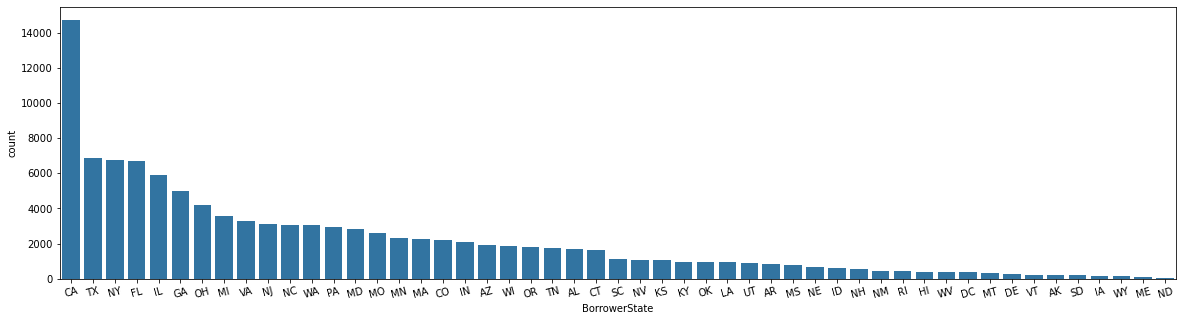

In [12]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df_loan, x='BorrowerState', color=color, order=df_loan.BorrowerState.value_counts().index)
plt.xticks(rotation=15);

From the bar plot, California has the highest number of borrowers (it is even more than twice than of the second, Texas).

### Question
#### What is the credit grade of most borrowers?

In [13]:
credit_grade = df_loan.CreditGrade.value_counts(sort=False)
credit_grade

AA    3509
A     3315
B     4389
C     5649
D     5153
E     3289
HR    3508
NC     141
Name: CreditGrade, dtype: int64

<BarContainer object of 8 artists>

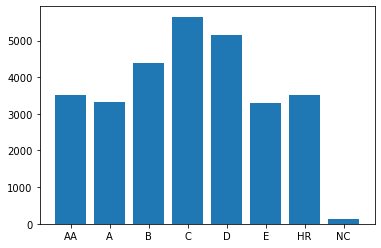

In [14]:
plt.bar(credit_grade.index, credit_grade)

Most borrowers have a credit grade of C. As expected,  there were not a lot of borrowers with a credit grade of NC

### Question
#### Are there more borrowers that are homeowners?

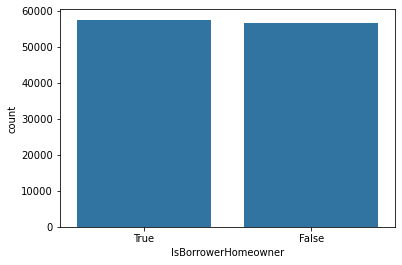

In [15]:
order = df_loan.IsBorrowerHomeowner.value_counts().index
sns.countplot(data=df_loan, x='IsBorrowerHomeowner', color=color, order=order);

From the plot, there are more borrowers who are homeowners, although they are almost the same in number.

### Question
#### How much is owed the most?

Next, I'll explore how much the borrowers are owing (after the due date). Since this is a continuous value, I'll have to split it into bins in order to plot it

In [16]:
df_loan.AmountDelinquent.describe()

count    106315.000000
mean        984.507059
std        7158.270157
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

From this, we see that more than 75% of the delinguent amounts are 0, which means a lot of these loans were paid on time. I have to remove all the 0 entries to be able to plot the remaining values

In [17]:
df_loan.AmountDelinquent.value_counts()

0.0        89818
50.0          73
100.0         67
25.0          66
30.0          65
           ...  
14910.0        1
1280.0         1
13180.0        1
2023.0         1
5062.0         1
Name: AmountDelinquent, Length: 7059, dtype: int64

In [18]:
df_amount_delinquent = df_loan[df_loan.AmountDelinquent != 0]

In [19]:
df_amount_delinquent.AmountDelinquent.describe()

count     16497.000000
mean       6344.660726
std       17211.283880
min           1.000000
25%         246.000000
50%        1067.000000
75%        5061.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

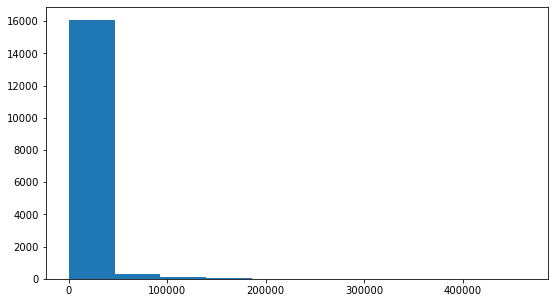

In [20]:
plt.figure(figsize=(9, 5))
plt.hist(df_amount_delinquent.AmountDelinquent);

I would have to change the scale of the x-axis to a log scale

In [21]:
np.log10(df_amount_delinquent.AmountDelinquent.describe())

count    4.217405
mean     3.802408
std      4.235813
min      0.000000
25%      2.390935
50%      3.028164
75%      3.704236
max      5.666407
Name: AmountDelinquent, dtype: float64

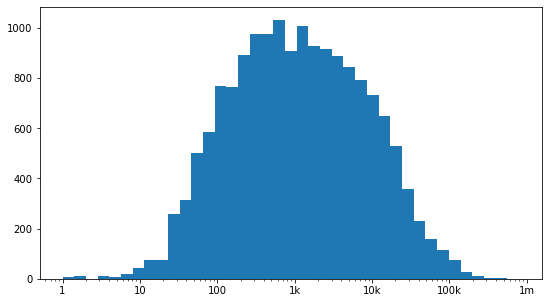

In [22]:
amount_bins = np.logspace(0, 5.7+0.2, 40)
tick_loc = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]
tick_label =[1, 10, 100, '1k', '10k', '100k', '1m']

plt.figure(figsize=(9, 5))
plt.hist(df_amount_delinquent.AmountDelinquent, bins=amount_bins)
plt.xscale('log')
plt.xticks(tick_loc, tick_label);

When plotted on a log scale, the amount delinquent is roughly bimodal around 1000. The amount goes up steadily to just before 1k. Interestingly at exactly 1k it goes down and rises up again after 1k, after which it steadily drops.

### Question
#### What is the income range of most borrowers?

In [23]:
loan_income = df_loan.IncomeRange.value_counts(sort=False).drop(index='Not displayed')
loan_income

Not employed        806
$0                  621
$1-24,999          7274
$25,000-49,999    32192
$50,000-74,999    31050
$75,000-99,999    16916
$100,000+         17337
Name: IncomeRange, dtype: int64

I would have to combine the unemployed borrowers and those who earn $0

In [24]:
loan_income.loc['$0'] = loan_income.loc['$0'] + loan_income.loc['Not employed']
loan_income = loan_income.drop(index='Not employed')
loan_income

$0                 1427
$1-24,999          7274
$25,000-49,999    32192
$50,000-74,999    31050
$75,000-99,999    16916
$100,000+         17337
Name: IncomeRange, dtype: int64

<BarContainer object of 6 artists>

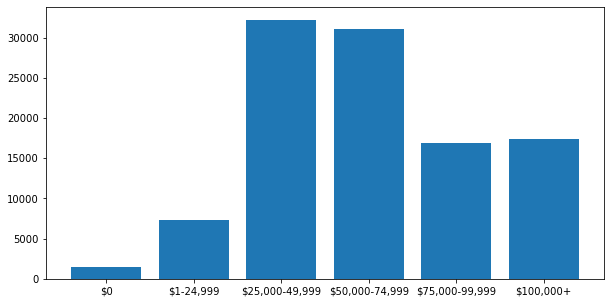

In [25]:
plt.figure(figsize=(10, 5))
plt.bar(loan_income.index, loan_income)

The income range of most borrowers is between $25000 and $75000.

### Question
#### What is the occupation of most borrowers

<BarContainer object of 67 artists>

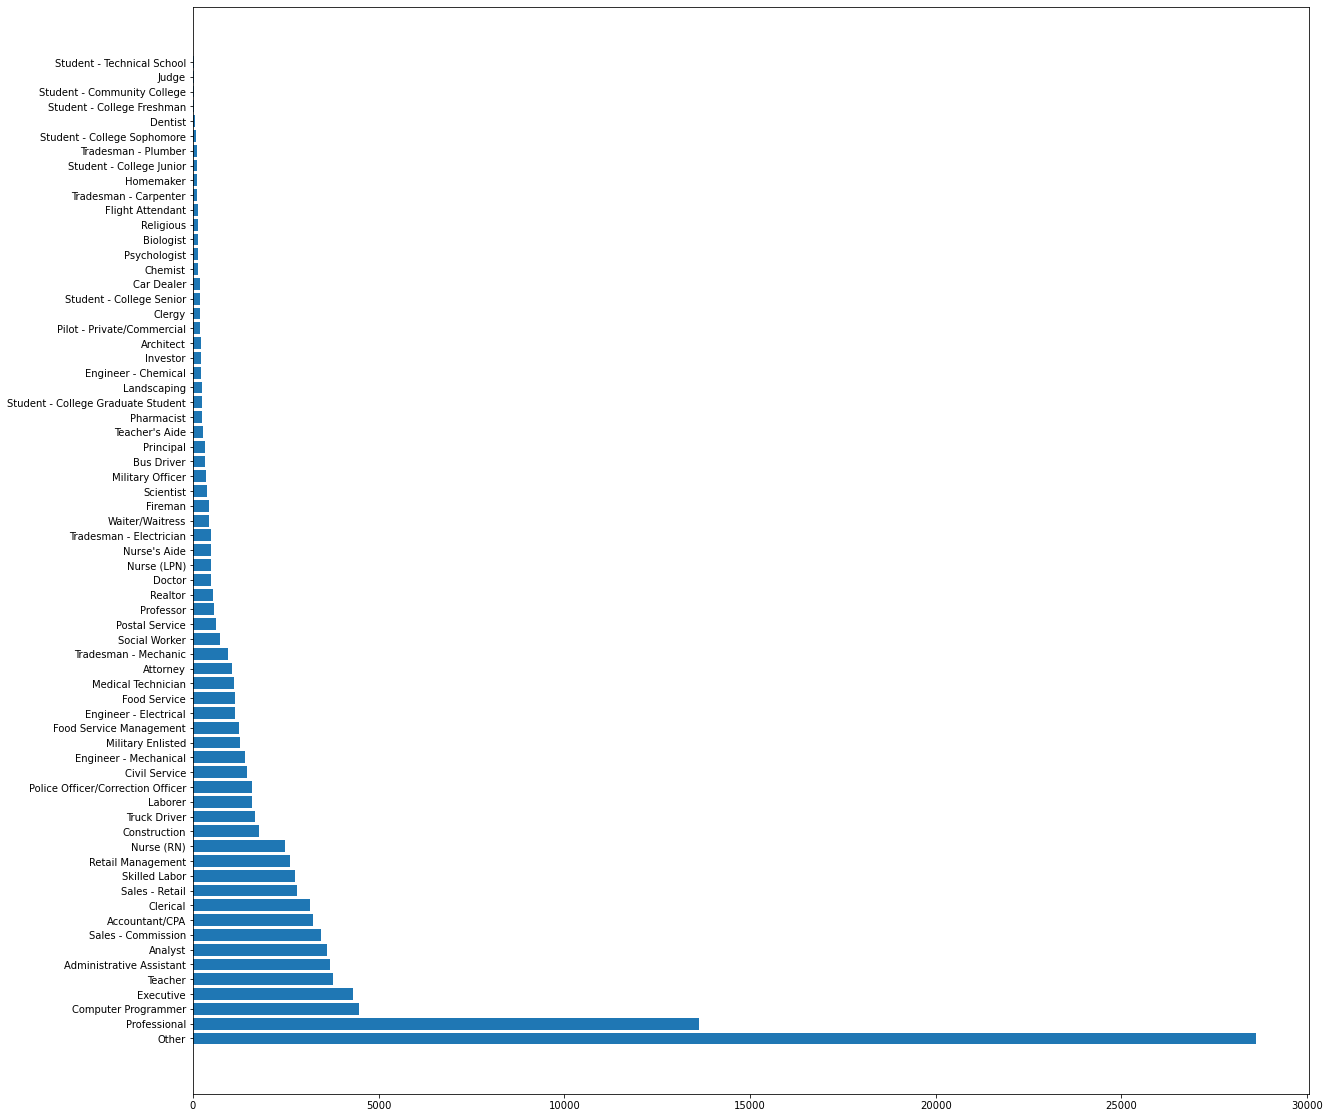

In [26]:
plt.figure(figsize=(20, 20))
plt.barh(df_loan.Occupation.value_counts().index, df_loan.Occupation.value_counts())

I wanted to find out the occupation of most borrowers but the occupation of most of them was not specified. Those who worked in offices did come in second place with about 12% of the total number of borrowers. Programmers did number almost 5000 which makes up about 4%.

### Question
#### What is the employement status of most borrowers?

<AxesSubplot:xlabel='EmploymentStatus', ylabel='count'>

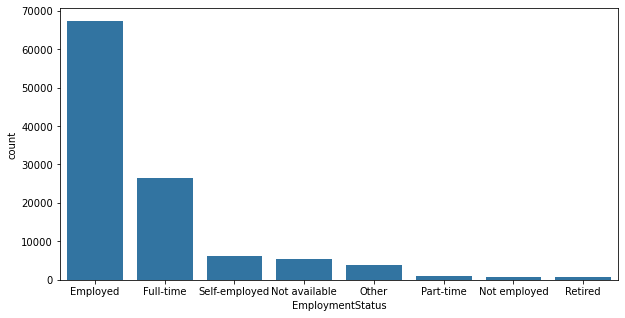

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_loan, x='EmploymentStatus', color=color, order=df_loan.EmploymentStatus.value_counts().index)

I cannot make any conclusions from this plot as it is not exactly clear what these values mean. Are Full-time borrowers different from 'employed' borrowers? 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The amount delinquent variable (amount overdue) took on a large range and I needed to apply a log transform after removing all the 0 values. After transformation, the variable looked bimodal with peaks around 1k. I also observed that most borrowers lived in California and the most frequent income range was 25000 to 75000 annually. It makes me wonder if the average salary of someone living in CA is in that range.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The occupation had a lot of unspecific values which did not give me a desired result. I needed to merge the 'Not employed' entries with the $0 entries when exploring the Income Range variable. I also had to remove the 'Not displayed' entries as they would have resulted in inaccurate plots.

## Bivariate Exploration

### Question
#### How does the credit grade affect the number of investors that funds the loan?

In [28]:
grade_groupby = df_loan[['CreditGrade', 'Investors']].groupby('CreditGrade').mean()
grade_groupby

,Investors
CreditGrade,
AA,188.102023
A,186.689291
B,168.241285
C,111.960701
D,84.656705
E,48.395257
HR,30.510547
NC,28.617021


<BarContainer object of 8 artists>

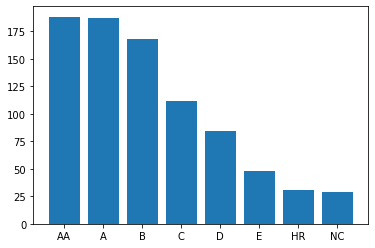

In [29]:
plt.bar(grade_groupby.index, grade_groupby.Investors)

This plot shows that a higher credit grade will generally attract more investors to fund the loan. But I will need to explore more to find out the distribution of the investors.

<AxesSubplot:xlabel='CreditGrade', ylabel='Investors'>

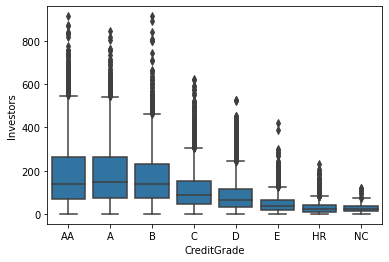

In [30]:
sns.boxplot(data=df_loan, x='CreditGrade', y='Investors', color=color)

This box plot supports the adapted bar chart as the median and quartiles increase with a higher grade.

### Question
#### Are investors more likely to fund borrowers in groups

In [31]:
group_groupby = df_loan[['CurrentlyInGroup', 'Investors']].groupby('CurrentlyInGroup').mean()
group_groupby

,Investors
CurrentlyInGroup,
False,77.022792
True,107.949760


([<matplotlib.axis.XTick at 0x19be0ed54c0>,
 [Text(False, 0, 'Not in group'), Text(True, 0, 'In group')])

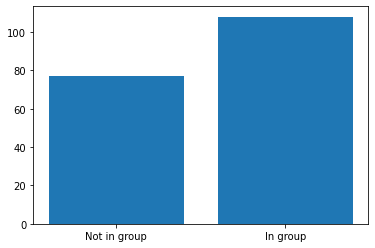

In [32]:
plt.bar(group_groupby.index, group_groupby.Investors)
plt.xticks([False, True], ['Not in group', 'In group'])

Investors are more likely to fund borrowers in groups

### Question
#### Does the state the borrowers live in affect the number of investors that fund the loan?

To conduct this exploration, I will follow the same steps I used to explore Investors and credit grade

In [33]:
state_groupby = df_loan[['BorrowerState', 'Investors']].groupby('BorrowerState').mean().sort_values(by='Investors', ascending=False)
state_groupby

,Investors
BorrowerState,
IA,124.021505
DC,105.052356
ME,100.376238
UT,98.486887
GA,95.316094
KS,90.645951
CA,90.041856
MD,87.799007
WA,87.328412


<BarContainer object of 51 artists>

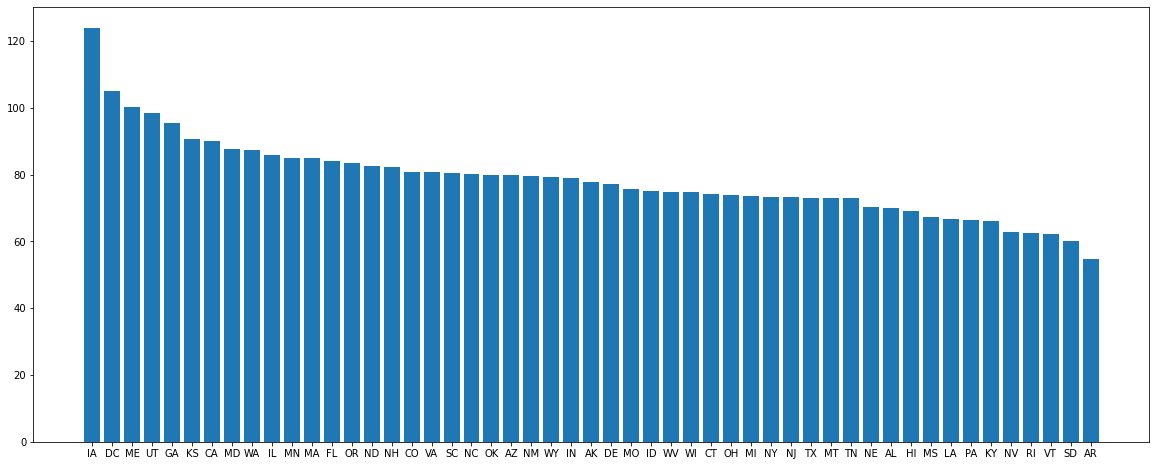

In [34]:
plt.figure(figsize=(20, 8))
plt.bar(state_groupby.index, state_groupby.Investors)

It can be seen from this plot that even though the state of California had the highest number of borrowers, it doesn't have the highest number of investors. It could be as a result of the credit grade of California borrowers because, as we have seen, the higher the credit grade, the higher the number of investors

<AxesSubplot:xlabel='BorrowerState', ylabel='Investors'>

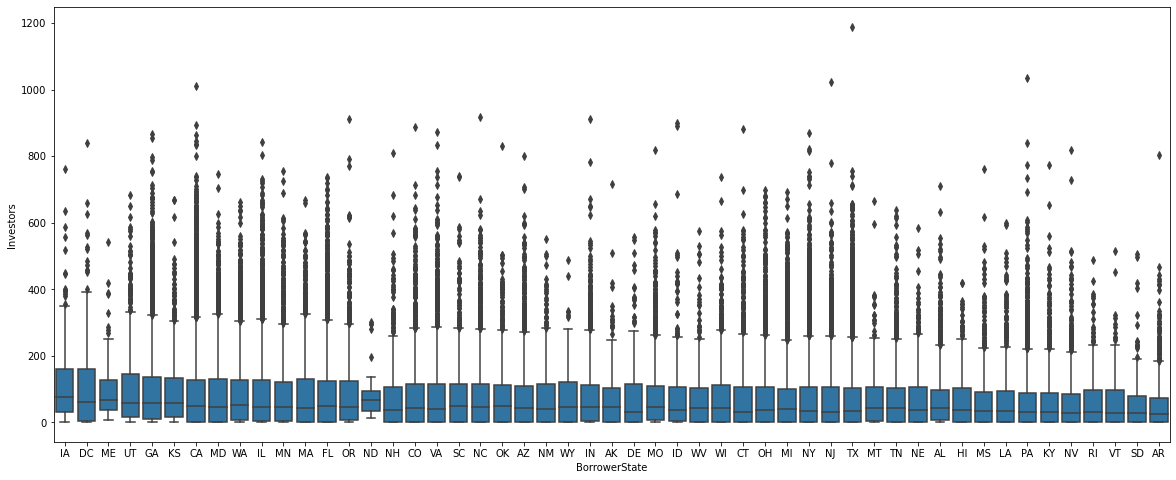

In [35]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df_loan, x='BorrowerState', y='Investors', color=color, order=state_groupby.index)

This plot supports the claim that Iowa has the highest number of Investors

### Question
#### What income range do Investors fund the most?

In [36]:
income_groupby = df_loan[['IncomeRange', 'Investors']].groupby('IncomeRange').mean()
income_groupby.loc['$0'] = income_groupby.loc['$0'] + income_groupby.loc['Not employed']
income_groupby = income_groupby.drop(labels=['Not employed', 'Not displayed'])

In [37]:
income_groupby

,Investors
IncomeRange,
$0,171.735075
"$1-24,999",58.544405
"$25,000-49,999",68.932809
"$50,000-74,999",79.398905
"$75,000-99,999",88.972866
"$100,000+",109.964642


<BarContainer object of 6 artists>

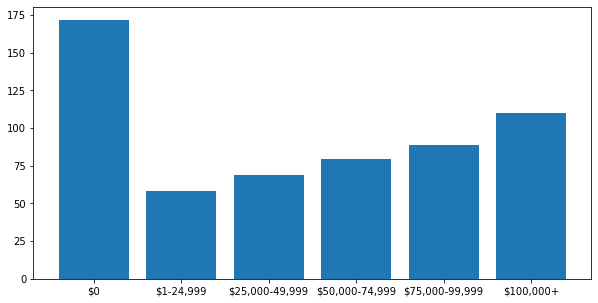

In [38]:
plt.figure(figsize=(10, 5))
plt.bar(income_groupby.index, income_groupby.Investors)

From this plot, it can be seen that investors fund more borrowers that do not have jobs or earn money. It could also mean that the reason why Iowa had more investors funding than other states (because there are more unemployed borrowers)

### Question
#### How does the income range and credit rate of borrowers affect their amount delinquent?

In [39]:
def log_trans(x, inverse=False):
    "function for applying a log transform to a sequence"
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

In [40]:
loan_copy = df_loan[df_loan.AmountDelinquent != 0]
loan_copy['AmountDelinquentLog'] = loan_copy.AmountDelinquent.apply(log_trans)

C:\Users\oluwa\AppData\Local\Temp\ipykernel_15416\1694290905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_copy['AmountDelinquentLog'] = loan_copy.AmountDelinquent.apply(log_trans)


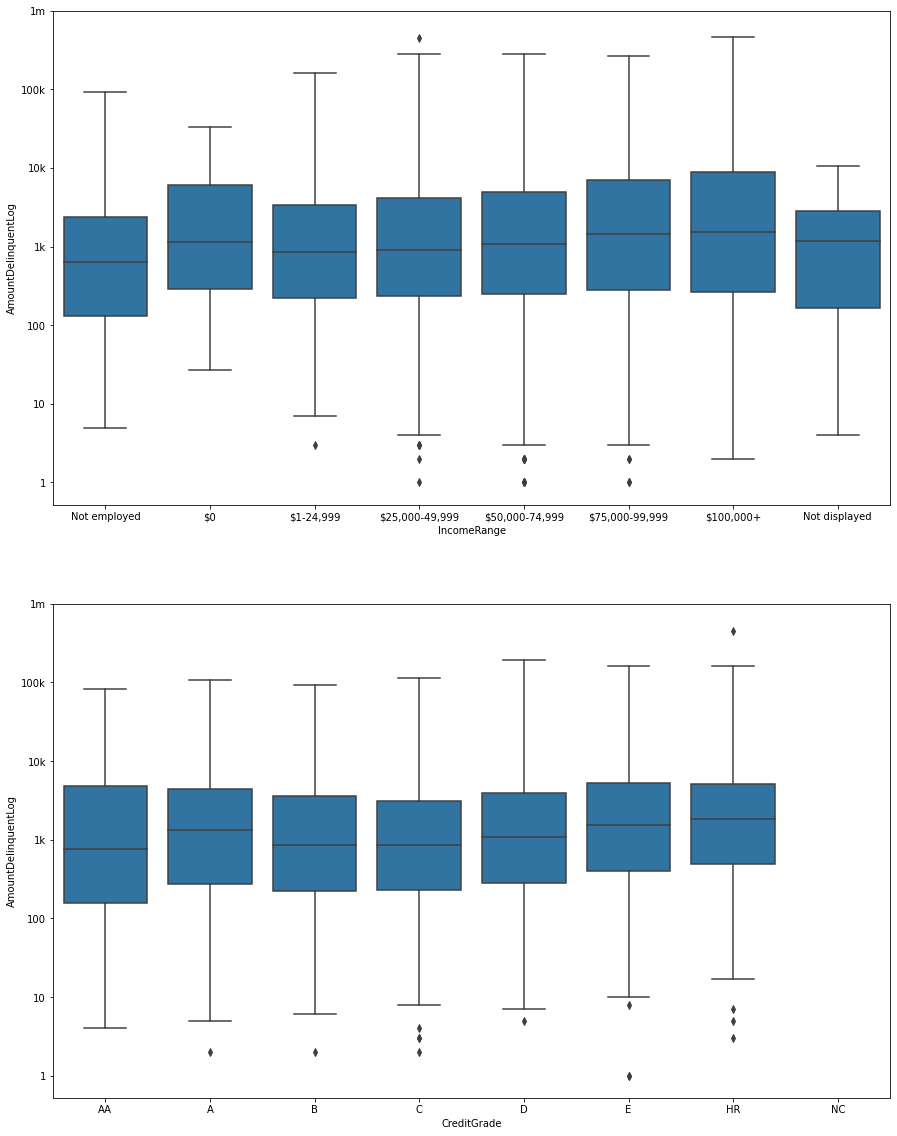

In [41]:
tick_loc = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]
tick_label =[1, 10, 100, '1k', '10k', '100k', '1m']
plt.figure(figsize=(15, 20))

plt.subplot(211)
sns.boxplot(data=loan_copy, x='IncomeRange', y='AmountDelinquentLog', color=color)
plt.yticks(log_trans(tick_loc), tick_label)

plt.subplot(212)
sns.boxplot(data=loan_copy, x='CreditGrade', y='AmountDelinquentLog', color=color)
plt.yticks(log_trans(tick_loc), tick_label);

This plot shows that borrowers that are unemployed and earn no money owe more money. It also shows that the credit grade of the borrower does not affect their ability to pay on time, even though the highest amount delinquent is owed by a borrower with the lowest credit grade

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The credit grade of borrowers was a major factor that determined if investors funded the loan as it was shown that borrowers with higher credit grades had more investor funding.

### Were there any interesting or surprising interactions between features?

It was surprising to see that investors funded borrowers that werre unemployed or had no source of income, even though the borrowers in this category did owe more money

## Multivariate Exploration

### Question
#### What is the relationship between the state and credit rate of the borrowers and investor?
The main thing I want to explore is if there is any relationship between credit grade, state and number of investors that fund the loan

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


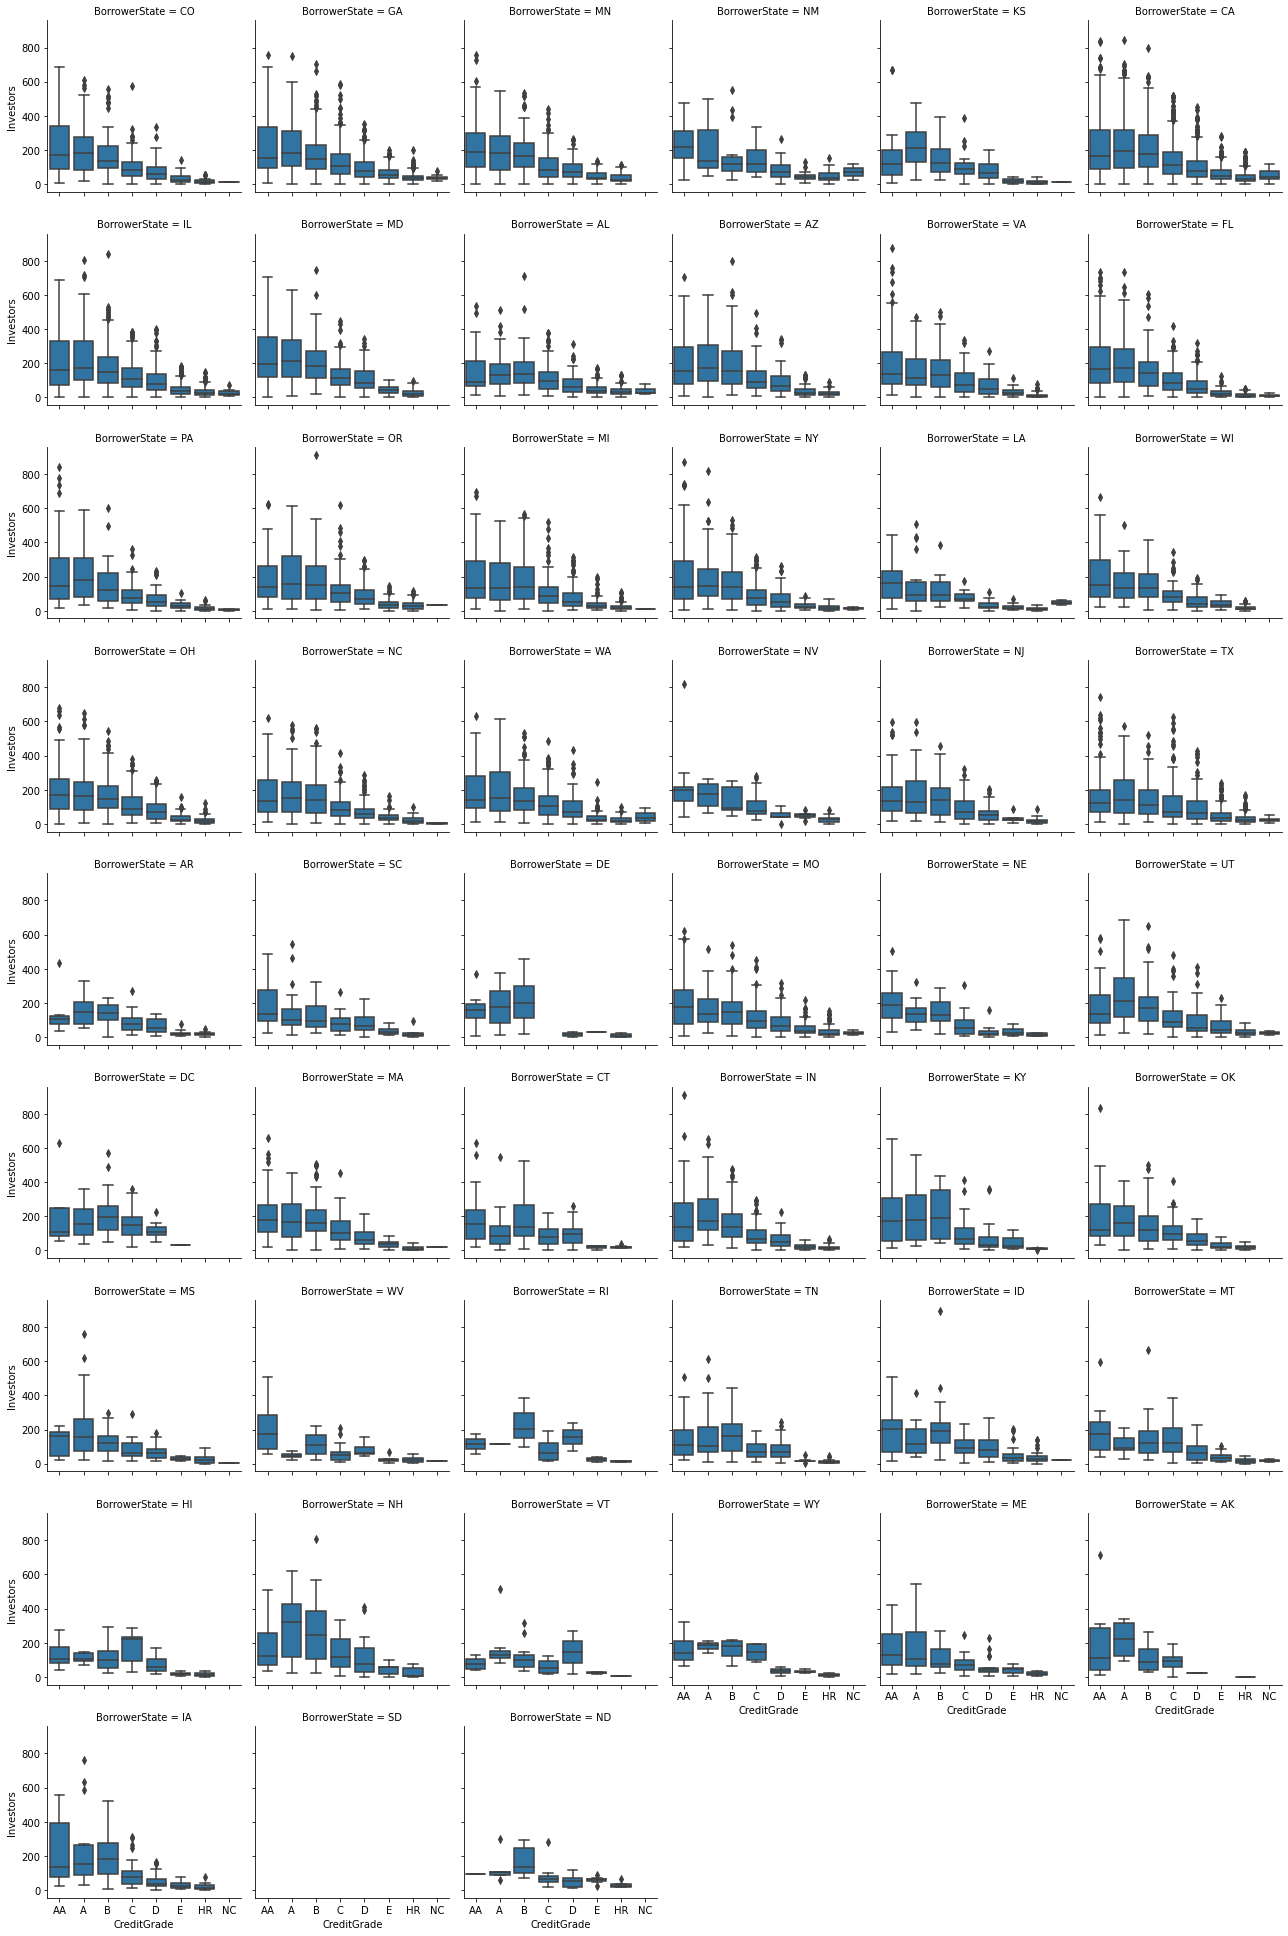

In [42]:
g = sns.FacetGrid(data=df_loan, col='BorrowerState', col_wrap=6)
g.map(sns.boxplot, 'CreditGrade', 'Investors', color=color)

This plot shows that the investors rely more on the credit grade of the borrower than the state as the trend generally stays the same (the higher the credit grade, the more investors there are)

<AxesSubplot:xlabel='CreditGrade', ylabel='Investors'>

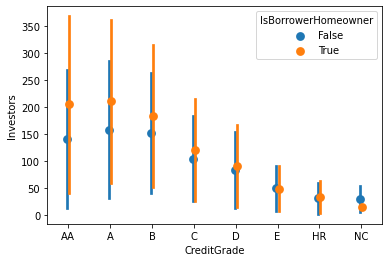

In [43]:
sns.pointplot(data=df_loan, x='CreditGrade', y='Investors', hue='IsBorrowerHomeowner', dodge=True, linestyles="", ci='sd')

<AxesSubplot:xlabel='CreditGrade', ylabel='Investors'>

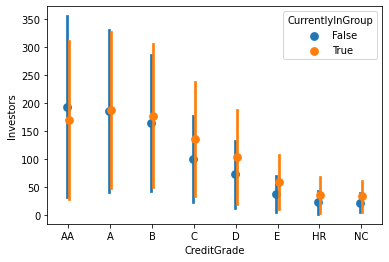

In [44]:
sns.pointplot(data=df_loan, x='CreditGrade', y='Investors', hue='CurrentlyInGroup', dodge=True, linestyles="", ci='sd')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

This proves that the credit grade of borrowers is one of the most important factors for investors to determine if the loan is worth funding. I also observed that borrowers who were homeowners did have more investor funding

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The state of residence of the borrowers is not a factor that investors consider when funding loans. California did have the highest number of borrowers

## Conclusions
From this dataset, I found out that the credit grade of borrowers determined likelihood of getting a loan. Also, those who were unemployed or had no source of income did have a higher chance of getting investor funding, even though they were the ones least likely to pay back early.

I did some data wrangling and chose the features I wanted to observe before starting my analyses. I started with univariate plots of some of the features and moved on to bivariate plots, after which I concluded with multivariate plots
